# Models Comparison for TinyML

In [23]:
# Load libraries
import numpy as np
from numpy import arange
import pickle
#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import seaborn as sbs
import sys

warnings.filterwarnings('ignore')

In [24]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)
tasks = ["2Labels", "3Labels", "4Labels", "5Labels"]
# Change this to change subtask
taskIndex = 2

In [25]:
with open('data/X.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y.pkl', 'rb') as f:
    y = pickle.load(f)

In [26]:
n_labels = 2 + taskIndex
samples = 100
X = X[:n_labels*samples]
y = y[:n_labels*samples]
labels = np.unique(y)

In [27]:
classes = np.unique(y).tolist()
for i in range(len(classes)):
    y = np.where(y==classes[i], i, y)

In [28]:
y = np.array([int(el) for el in y])
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
print(X_test.shape)
print(y_test.shape)


(80, 42)
(80,)


In [41]:
X_test

array([[ 0.08,  0.01,  0.98,  0.09,  0.02,  0.98,  0.1 ,  0.06,  1.04,
         0.11, -0.19,  1.09,  0.12, -0.12,  0.84,  0.2 ,  0.18,  0.72,
         0.16,  0.21,  0.95,  0.1 ,  0.1 ,  1.09,  0.06, -0.01,  1.  ,
         0.08,  0.04,  0.96,  0.07,  0.04,  0.98,  0.07,  0.02,  0.96,
         0.09,  0.06,  0.98,  0.05,  0.01,  1.  ],
       [ 0.07, -0.1 ,  0.93,  0.09,  0.06,  1.02,  0.11, -0.04,  1.02,
         0.15, -0.13,  1.03,  0.18, -0.03,  0.91,  0.2 , -0.  ,  0.82,
         0.16, -0.03,  0.83,  0.15,  0.1 ,  1.05,  0.11,  0.08,  0.98,
         0.03, -0.16,  0.96,  0.09,  0.04,  0.97,  0.05, -0.03,  1.  ,
         0.07, -0.01,  0.99,  0.11,  0.08,  0.93],
       [ 0.05, -0.07,  0.97,  0.02, -0.14,  1.  ,  0.06,  0.01,  1.07,
         0.07, -0.18,  1.02,  0.11, -0.08,  0.86,  0.15,  0.09,  0.94,
         0.11,  0.08,  1.07,  0.07,  0.01,  1.02,  0.09, -0.  ,  1.02,
         0.08, -0.06,  0.98,  0.09,  0.01,  0.98,  0.09,  0.01,  0.99,
         0.03, -0.04,  0.99,  0.09,  0.01,  0.

In [30]:
y_test

array([2, 1, 0, 0, 2, 0, 3, 1, 2, 0, 1, 3, 3, 1, 2, 3, 1, 3, 2, 2, 3, 0,
       2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 3, 2, 0, 3, 2, 1, 3, 0, 0, 0, 1, 3,
       0, 3, 3, 2, 1, 3, 2, 3, 0, 2, 3, 2, 2, 3, 2, 1, 1, 0, 1, 1, 1, 1,
       3, 3, 0, 2, 2, 0, 0, 1, 3, 1, 2, 0, 0, 3])

## Model Spotting

In [31]:
# Test options and evaluation metric
num_folds = 5
seed = 42
scoring = 'f1_macro'

In [32]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.9999, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=150, 
                                                           max_features=2, criterion='gini', max_depth=None,
                                                           min_samples_split=2, min_samples_leaf=1)))



In [33]:
# Cross Validation
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,82 0,04
LR - 0,86 0,05
CART - 0,74 0,04
SVC - 0,92 0,04
RF - 0,90 0,04


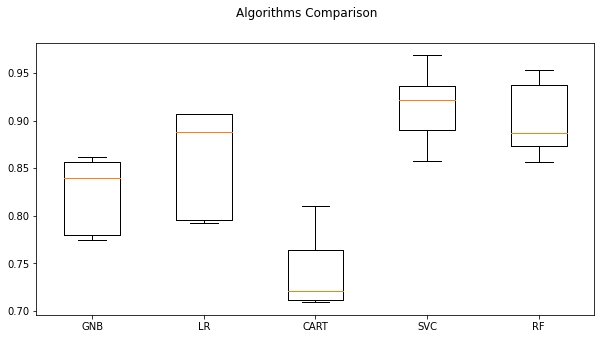

In [34]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Valutazione dei migliori algoritmi su test

## Valutazione modelli sul Test Set

In [35]:
def classification_report_csv(report, model_name):
    report_data = []
    lines = report.split('\n')
    index = 0
    row = lines[-4].split('    ')
    accuracy = row[-2] if taskIndex > 1 else row[-3]
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = labels[index]
        row['precision'] = float(row_data[2]) 
        row['recall'] = float(row_data[3]) 
        row['f1_score'] = float(row_data[4])
        row['accuracy'] = accuracy
        report_data.append(row)
        index += 1
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(tasks[taskIndex] + "/classificationReports/" +'report' + model_name +  '.csv', index = False)
    
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    classification_report_csv(report, name)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.78      0.70      0.74        20
           2       0.77      0.85      0.81        20
           3       0.95      0.95      0.95        20

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80

-------------------------------------------------------------
Model LR: 
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.89      0.80      0.84        20
           2       0.94      0.80      0.86        20
           3       0.90      0.90      0.90        20

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80

---------------------------------------------

# Neural Network

In [36]:
#Hyperparameters of NN
EPOCHS = 500 
BATCH_SIZE = 7
learn_rate = 0.001
nodes = 512
def getNetwork():
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dropout(0.25))    
    model.add(layers.Dense(nodes, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    opt = Adam(learning_rate=learn_rate)
    # SGB
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

## Cross Validation NN

In [37]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 42)                1806      
_________________________________________________________________
dropout_4 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               22016     
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 2052      
Total params: 25,874
Trainable params: 25,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
37/37 [==============================] - 0s 488us/step - loss: 1.3990 - accuracy: 0.2773
Epoch 2/500
37

Epoch 151/500
37/37 [==============================] - 0s 444us/step - loss: 0.0656 - accuracy: 0.9688
Epoch 152/500
37/37 [==============================] - 0s 445us/step - loss: 0.0909 - accuracy: 0.9570
Epoch 153/500
37/37 [==============================] - 0s 433us/step - loss: 0.1058 - accuracy: 0.9570
Epoch 154/500
37/37 [==============================] - 0s 444us/step - loss: 0.0566 - accuracy: 0.9805
Epoch 155/500
37/37 [==============================] - 0s 448us/step - loss: 0.0735 - accuracy: 0.9648
Epoch 156/500
37/37 [==============================] - 0s 438us/step - loss: 0.0620 - accuracy: 0.9766
Epoch 157/500
37/37 [==============================] - 0s 450us/step - loss: 0.0989 - accuracy: 0.9609
Epoch 158/500
37/37 [==============================] - 0s 446us/step - loss: 0.0783 - accuracy: 0.9609
Epoch 159/500
37/37 [==============================] - 0s 456us/step - loss: 0.0726 - accuracy: 0.9766
Epoch 160/500
37/37 [==============================] - 0s 443us/step - lo

37/37 [==============================] - 0s 437us/step - loss: 0.0882 - accuracy: 0.9648
Epoch 310/500
37/37 [==============================] - 0s 460us/step - loss: 0.0277 - accuracy: 0.9883
Epoch 311/500
37/37 [==============================] - 0s 443us/step - loss: 0.0499 - accuracy: 0.9844
Epoch 312/500
37/37 [==============================] - 0s 442us/step - loss: 0.0234 - accuracy: 0.9922
Epoch 313/500
37/37 [==============================] - 0s 452us/step - loss: 0.0452 - accuracy: 0.9805
Epoch 314/500
37/37 [==============================] - 0s 449us/step - loss: 0.0219 - accuracy: 0.9961
Epoch 315/500
37/37 [==============================] - 0s 447us/step - loss: 0.0430 - accuracy: 0.9844
Epoch 316/500
37/37 [==============================] - 0s 457us/step - loss: 0.0707 - accuracy: 0.9805
Epoch 317/500
37/37 [==============================] - 0s 446us/step - loss: 0.0554 - accuracy: 0.9922
Epoch 318/500
37/37 [==============================] - 0s 452us/step - loss: 0.0298 - a

37/37 [==============================] - 0s 453us/step - loss: 0.0115 - accuracy: 0.9961
Epoch 468/500
37/37 [==============================] - 0s 443us/step - loss: 0.0187 - accuracy: 0.9922
Epoch 469/500
37/37 [==============================] - 0s 458us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 470/500
37/37 [==============================] - 0s 446us/step - loss: 0.0585 - accuracy: 0.9844
Epoch 471/500
37/37 [==============================] - 0s 476us/step - loss: 0.0358 - accuracy: 0.9883
Epoch 472/500
37/37 [==============================] - 0s 450us/step - loss: 0.0284 - accuracy: 0.9961
Epoch 473/500
37/37 [==============================] - 0s 467us/step - loss: 0.0450 - accuracy: 0.9805
Epoch 474/500
37/37 [==============================] - 0s 445us/step - loss: 0.0265 - accuracy: 0.9922
Epoch 475/500
37/37 [==============================] - 0s 446us/step - loss: 0.0399 - accuracy: 0.9766
Epoch 476/500
37/37 [==============================] - 0s 443us/step - loss: 0.0246 - a

37/37 [==============================] - 0s 415us/step - loss: 0.0833 - accuracy: 0.9688
Epoch 118/500
37/37 [==============================] - 0s 407us/step - loss: 0.0659 - accuracy: 0.9766
Epoch 119/500
37/37 [==============================] - 0s 409us/step - loss: 0.0690 - accuracy: 0.9727
Epoch 120/500
37/37 [==============================] - 0s 410us/step - loss: 0.0744 - accuracy: 0.9727
Epoch 121/500
37/37 [==============================] - 0s 412us/step - loss: 0.0802 - accuracy: 0.9727
Epoch 122/500
37/37 [==============================] - 0s 402us/step - loss: 0.0420 - accuracy: 0.9922
Epoch 123/500
37/37 [==============================] - 0s 410us/step - loss: 0.0868 - accuracy: 0.9688
Epoch 124/500
37/37 [==============================] - 0s 405us/step - loss: 0.0637 - accuracy: 0.9805
Epoch 125/500
37/37 [==============================] - 0s 416us/step - loss: 0.1052 - accuracy: 0.9609
Epoch 126/500
37/37 [==============================] - 0s 409us/step - loss: 0.0690 - a

37/37 [==============================] - 0s 411us/step - loss: 0.0476 - accuracy: 0.9805
Epoch 276/500
37/37 [==============================] - 0s 422us/step - loss: 0.0450 - accuracy: 0.9766
Epoch 277/500
37/37 [==============================] - 0s 424us/step - loss: 0.0289 - accuracy: 0.9922
Epoch 278/500
37/37 [==============================] - 0s 413us/step - loss: 0.0231 - accuracy: 0.9922
Epoch 279/500
37/37 [==============================] - 0s 412us/step - loss: 0.0261 - accuracy: 0.9883
Epoch 280/500
37/37 [==============================] - 0s 405us/step - loss: 0.0442 - accuracy: 0.9805
Epoch 281/500
37/37 [==============================] - 0s 410us/step - loss: 0.0996 - accuracy: 0.9688
Epoch 282/500
37/37 [==============================] - 0s 417us/step - loss: 0.0465 - accuracy: 0.9922
Epoch 283/500
37/37 [==============================] - 0s 408us/step - loss: 0.0539 - accuracy: 0.9883
Epoch 284/500
37/37 [==============================] - 0s 413us/step - loss: 0.0343 - a

37/37 [==============================] - 0s 461us/step - loss: 0.0266 - accuracy: 0.9883
Epoch 434/500
37/37 [==============================] - 0s 451us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 435/500
37/37 [==============================] - 0s 450us/step - loss: 0.0416 - accuracy: 0.9805
Epoch 436/500
37/37 [==============================] - 0s 448us/step - loss: 0.1030 - accuracy: 0.9648
Epoch 437/500
37/37 [==============================] - 0s 436us/step - loss: 0.0694 - accuracy: 0.9648
Epoch 438/500
37/37 [==============================] - 0s 444us/step - loss: 0.0552 - accuracy: 0.9805
Epoch 439/500
37/37 [==============================] - 0s 453us/step - loss: 0.1040 - accuracy: 0.9648
Epoch 440/500
37/37 [==============================] - 0s 452us/step - loss: 0.0434 - accuracy: 0.9883
Epoch 441/500
37/37 [==============================] - 0s 442us/step - loss: 0.0407 - accuracy: 0.9922
Epoch 442/500
37/37 [==============================] - 0s 427us/step - loss: 0.0595 - a

37/37 [==============================] - 0s 412us/step - loss: 0.1028 - accuracy: 0.9609
Epoch 83/500
37/37 [==============================] - 0s 416us/step - loss: 0.1206 - accuracy: 0.9609
Epoch 84/500
37/37 [==============================] - 0s 435us/step - loss: 0.0936 - accuracy: 0.9727
Epoch 85/500
37/37 [==============================] - 0s 420us/step - loss: 0.0775 - accuracy: 0.9727
Epoch 86/500
37/37 [==============================] - 0s 418us/step - loss: 0.1092 - accuracy: 0.9531
Epoch 87/500
37/37 [==============================] - 0s 448us/step - loss: 0.0961 - accuracy: 0.9727
Epoch 88/500
37/37 [==============================] - 0s 452us/step - loss: 0.0991 - accuracy: 0.9609
Epoch 89/500
37/37 [==============================] - 0s 459us/step - loss: 0.1148 - accuracy: 0.9609
Epoch 90/500
37/37 [==============================] - 0s 443us/step - loss: 0.0736 - accuracy: 0.9766
Epoch 91/500
37/37 [==============================] - 0s 440us/step - loss: 0.0872 - accuracy: 

37/37 [==============================] - 0s 461us/step - loss: 0.0406 - accuracy: 0.9883
Epoch 241/500
37/37 [==============================] - 0s 464us/step - loss: 0.0527 - accuracy: 0.9883
Epoch 242/500
37/37 [==============================] - 0s 475us/step - loss: 0.0341 - accuracy: 0.9844
Epoch 243/500
37/37 [==============================] - 0s 450us/step - loss: 0.0531 - accuracy: 0.9648
Epoch 244/500
37/37 [==============================] - 0s 442us/step - loss: 0.0433 - accuracy: 0.9766
Epoch 245/500
37/37 [==============================] - 0s 441us/step - loss: 0.0235 - accuracy: 1.0000
Epoch 246/500
37/37 [==============================] - 0s 458us/step - loss: 0.0338 - accuracy: 0.9844
Epoch 247/500
37/37 [==============================] - 0s 450us/step - loss: 0.0473 - accuracy: 0.9805
Epoch 248/500
37/37 [==============================] - 0s 454us/step - loss: 0.0317 - accuracy: 0.9883
Epoch 249/500
37/37 [==============================] - 0s 455us/step - loss: 0.0556 - a

37/37 [==============================] - 0s 454us/step - loss: 0.0357 - accuracy: 0.9883
Epoch 399/500
37/37 [==============================] - 0s 474us/step - loss: 0.0310 - accuracy: 0.9844
Epoch 400/500
37/37 [==============================] - 0s 445us/step - loss: 0.0379 - accuracy: 0.9883
Epoch 401/500
37/37 [==============================] - 0s 458us/step - loss: 0.0417 - accuracy: 0.9805
Epoch 402/500
37/37 [==============================] - 0s 457us/step - loss: 0.0693 - accuracy: 0.9766
Epoch 403/500
37/37 [==============================] - 0s 451us/step - loss: 0.0489 - accuracy: 0.9844
Epoch 404/500
37/37 [==============================] - 0s 476us/step - loss: 0.0618 - accuracy: 0.9727
Epoch 405/500
37/37 [==============================] - 0s 465us/step - loss: 0.0333 - accuracy: 0.9805
Epoch 406/500
37/37 [==============================] - 0s 460us/step - loss: 0.0148 - accuracy: 0.9922
Epoch 407/500
37/37 [==============================] - 0s 455us/step - loss: 0.0447 - a

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_10 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               22016     
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 2052      
Total params: 25,874
Trainable params: 25,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
37/37 [==============================] - 0s 464us/step - loss: 1.4079 - accuracy: 0.2773
Epoch 2/500
37

Epoch 151/500
37/37 [==============================] - 0s 442us/step - loss: 0.1074 - accuracy: 0.9531
Epoch 152/500
37/37 [==============================] - 0s 468us/step - loss: 0.0696 - accuracy: 0.9844
Epoch 153/500
37/37 [==============================] - 0s 450us/step - loss: 0.1373 - accuracy: 0.9531
Epoch 154/500
37/37 [==============================] - 0s 461us/step - loss: 0.0956 - accuracy: 0.9609
Epoch 155/500
37/37 [==============================] - 0s 462us/step - loss: 0.0742 - accuracy: 0.9766
Epoch 156/500
37/37 [==============================] - 0s 448us/step - loss: 0.0647 - accuracy: 0.9805
Epoch 157/500
37/37 [==============================] - 0s 465us/step - loss: 0.0708 - accuracy: 0.9766
Epoch 158/500
37/37 [==============================] - 0s 443us/step - loss: 0.0523 - accuracy: 0.9883
Epoch 159/500
37/37 [==============================] - 0s 471us/step - loss: 0.0451 - accuracy: 0.9883
Epoch 160/500
37/37 [==============================] - 0s 458us/step - lo

37/37 [==============================] - 0s 448us/step - loss: 0.0598 - accuracy: 0.9727
Epoch 310/500
37/37 [==============================] - 0s 441us/step - loss: 0.0522 - accuracy: 0.9688
Epoch 311/500
37/37 [==============================] - 0s 467us/step - loss: 0.0572 - accuracy: 0.9805
Epoch 312/500
37/37 [==============================] - 0s 459us/step - loss: 0.0370 - accuracy: 0.9844
Epoch 313/500
37/37 [==============================] - 0s 449us/step - loss: 0.0281 - accuracy: 0.9922
Epoch 314/500
37/37 [==============================] - 0s 492us/step - loss: 0.0339 - accuracy: 0.9844
Epoch 315/500
37/37 [==============================] - 0s 470us/step - loss: 0.0399 - accuracy: 0.9844
Epoch 316/500
37/37 [==============================] - 0s 456us/step - loss: 0.0763 - accuracy: 0.9727
Epoch 317/500
37/37 [==============================] - 0s 444us/step - loss: 0.0505 - accuracy: 0.9805
Epoch 318/500
37/37 [==============================] - 0s 468us/step - loss: 0.0278 - a

37/37 [==============================] - 0s 465us/step - loss: 0.0293 - accuracy: 0.9883
Epoch 468/500
37/37 [==============================] - 0s 444us/step - loss: 0.0574 - accuracy: 0.9844
Epoch 469/500
37/37 [==============================] - 0s 463us/step - loss: 0.0530 - accuracy: 0.9688
Epoch 470/500
37/37 [==============================] - 0s 457us/step - loss: 0.0353 - accuracy: 0.9844
Epoch 471/500
37/37 [==============================] - 0s 463us/step - loss: 0.0625 - accuracy: 0.9883
Epoch 472/500
37/37 [==============================] - 0s 457us/step - loss: 0.0660 - accuracy: 0.9727
Epoch 473/500
37/37 [==============================] - 0s 458us/step - loss: 0.0434 - accuracy: 0.9844
Epoch 474/500
37/37 [==============================] - 0s 453us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 475/500
37/37 [==============================] - 0s 452us/step - loss: 0.0569 - accuracy: 0.9766
Epoch 476/500
37/37 [==============================] - 0s 450us/step - loss: 0.0729 - a

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_12 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               22016     
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 2052      
Total params: 25,874
Trainable params: 25,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
37/37 [==============================] - 0s 474us/step - loss: 1.3880 - accuracy: 0.2617
Epoch 2/500
37

Epoch 151/500
37/37 [==============================] - 0s 442us/step - loss: 0.0747 - accuracy: 0.9727
Epoch 152/500
37/37 [==============================] - 0s 436us/step - loss: 0.0944 - accuracy: 0.9609
Epoch 153/500
37/37 [==============================] - 0s 438us/step - loss: 0.0633 - accuracy: 0.9727
Epoch 154/500
37/37 [==============================] - 0s 447us/step - loss: 0.0696 - accuracy: 0.9688
Epoch 155/500
37/37 [==============================] - 0s 445us/step - loss: 0.0837 - accuracy: 0.9688
Epoch 156/500
37/37 [==============================] - 0s 442us/step - loss: 0.0582 - accuracy: 0.9766
Epoch 157/500
37/37 [==============================] - 0s 459us/step - loss: 0.0993 - accuracy: 0.9531
Epoch 158/500
37/37 [==============================] - 0s 446us/step - loss: 0.0676 - accuracy: 0.9727
Epoch 159/500
37/37 [==============================] - 0s 445us/step - loss: 0.0693 - accuracy: 0.9805
Epoch 160/500
37/37 [==============================] - 0s 446us/step - lo

37/37 [==============================] - 0s 452us/step - loss: 0.0626 - accuracy: 0.9688
Epoch 310/500
37/37 [==============================] - 0s 443us/step - loss: 0.0885 - accuracy: 0.9648
Epoch 311/500
37/37 [==============================] - 0s 455us/step - loss: 0.1044 - accuracy: 0.9609
Epoch 312/500
37/37 [==============================] - 0s 445us/step - loss: 0.0854 - accuracy: 0.9688
Epoch 313/500
37/37 [==============================] - 0s 433us/step - loss: 0.0533 - accuracy: 0.9805
Epoch 314/500
37/37 [==============================] - 0s 464us/step - loss: 0.0529 - accuracy: 0.9805
Epoch 315/500
37/37 [==============================] - 0s 457us/step - loss: 0.0509 - accuracy: 0.9727
Epoch 316/500
37/37 [==============================] - 0s 440us/step - loss: 0.0491 - accuracy: 0.9805
Epoch 317/500
37/37 [==============================] - 0s 456us/step - loss: 0.0491 - accuracy: 0.9805
Epoch 318/500
37/37 [==============================] - 0s 448us/step - loss: 0.0361 - a

37/37 [==============================] - 0s 415us/step - loss: 0.0984 - accuracy: 0.9648
Epoch 468/500
37/37 [==============================] - 0s 432us/step - loss: 0.0728 - accuracy: 0.9805
Epoch 469/500
37/37 [==============================] - 0s 452us/step - loss: 0.0411 - accuracy: 0.9805
Epoch 470/500
37/37 [==============================] - 0s 433us/step - loss: 0.0332 - accuracy: 0.9844
Epoch 471/500
37/37 [==============================] - 0s 412us/step - loss: 0.0513 - accuracy: 0.9727
Epoch 472/500
37/37 [==============================] - 0s 403us/step - loss: 0.0460 - accuracy: 0.9844
Epoch 473/500
37/37 [==============================] - 0s 417us/step - loss: 0.0190 - accuracy: 0.9961
Epoch 474/500
37/37 [==============================] - 0s 411us/step - loss: 0.0491 - accuracy: 0.9805
Epoch 475/500
37/37 [==============================] - 0s 410us/step - loss: 0.0398 - accuracy: 0.9883
Epoch 476/500
37/37 [==============================] - 0s 413us/step - loss: 0.0302 - a

Average score of Cross Validation: 0.9378064495592959


## Train and Test

In [38]:
model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_14 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               22016     
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 2052      
Total params: 25,874
Trainable params: 25,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
35/35 [==============================] - 0s 2ms/step - loss: 1.3828 - accuracy: 0.2625 - val_loss: 1.38

Epoch 51/500
35/35 [==============================] - 0s 688us/step - loss: 0.1912 - accuracy: 0.9292 - val_loss: 0.3801 - val_accuracy: 0.9125
Epoch 52/500
35/35 [==============================] - 0s 670us/step - loss: 0.2604 - accuracy: 0.9000 - val_loss: 0.4696 - val_accuracy: 0.8875
Epoch 53/500
35/35 [==============================] - 0s 685us/step - loss: 0.2021 - accuracy: 0.9500 - val_loss: 0.3825 - val_accuracy: 0.8875
Epoch 54/500
35/35 [==============================] - 0s 711us/step - loss: 0.1978 - accuracy: 0.9167 - val_loss: 0.3896 - val_accuracy: 0.8750
Epoch 55/500
35/35 [==============================] - 0s 720us/step - loss: 0.1627 - accuracy: 0.9375 - val_loss: 0.4404 - val_accuracy: 0.9125
Epoch 56/500
35/35 [==============================] - 0s 681us/step - loss: 0.2392 - accuracy: 0.9042 - val_loss: 0.3938 - val_accuracy: 0.9375
Epoch 57/500
35/35 [==============================] - 0s 679us/step - loss: 0.2057 - accuracy: 0.9375 - val_loss: 0.3995 - val_accuracy:

Epoch 108/500
35/35 [==============================] - 0s 697us/step - loss: 0.1103 - accuracy: 0.9583 - val_loss: 0.4537 - val_accuracy: 0.8875
Epoch 109/500
35/35 [==============================] - 0s 721us/step - loss: 0.1426 - accuracy: 0.9500 - val_loss: 0.4441 - val_accuracy: 0.8750
Epoch 110/500
35/35 [==============================] - 0s 756us/step - loss: 0.1412 - accuracy: 0.9333 - val_loss: 0.4805 - val_accuracy: 0.9125
Epoch 111/500
35/35 [==============================] - 0s 716us/step - loss: 0.0897 - accuracy: 0.9583 - val_loss: 0.4697 - val_accuracy: 0.9000
Epoch 112/500
35/35 [==============================] - 0s 701us/step - loss: 0.1302 - accuracy: 0.9500 - val_loss: 0.4413 - val_accuracy: 0.8750
Epoch 113/500
35/35 [==============================] - 0s 693us/step - loss: 0.0879 - accuracy: 0.9750 - val_loss: 0.4388 - val_accuracy: 0.9000
Epoch 114/500
35/35 [==============================] - 0s 766us/step - loss: 0.0982 - accuracy: 0.9625 - val_loss: 0.5341 - val_ac

35/35 [==============================] - 0s 818us/step - loss: 0.1319 - accuracy: 0.9500 - val_loss: 0.7196 - val_accuracy: 0.8625
Epoch 221/500
35/35 [==============================] - 0s 759us/step - loss: 0.0699 - accuracy: 0.9750 - val_loss: 0.6381 - val_accuracy: 0.8750
Epoch 222/500
35/35 [==============================] - 0s 771us/step - loss: 0.0436 - accuracy: 0.9875 - val_loss: 0.6128 - val_accuracy: 0.9000
Epoch 223/500
35/35 [==============================] - 0s 746us/step - loss: 0.0673 - accuracy: 0.9750 - val_loss: 0.6123 - val_accuracy: 0.9000
Epoch 224/500
35/35 [==============================] - 0s 751us/step - loss: 0.0547 - accuracy: 0.9875 - val_loss: 0.6062 - val_accuracy: 0.9125
Epoch 225/500
35/35 [==============================] - 0s 705us/step - loss: 0.1029 - accuracy: 0.9750 - val_loss: 0.6070 - val_accuracy: 0.9125
Epoch 226/500
35/35 [==============================] - 0s 776us/step - loss: 0.1378 - accuracy: 0.9375 - val_loss: 0.4272 - val_accuracy: 0.9000

35/35 [==============================] - 0s 680us/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.7822 - val_accuracy: 0.9125
Epoch 333/500
35/35 [==============================] - 0s 682us/step - loss: 0.0859 - accuracy: 0.9750 - val_loss: 0.6853 - val_accuracy: 0.9250
Epoch 334/500
35/35 [==============================] - 0s 798us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.6171 - val_accuracy: 0.9250
Epoch 335/500
35/35 [==============================] - 0s 736us/step - loss: 0.0323 - accuracy: 0.9875 - val_loss: 0.6033 - val_accuracy: 0.9125
Epoch 336/500
35/35 [==============================] - 0s 711us/step - loss: 0.0333 - accuracy: 0.9875 - val_loss: 0.6530 - val_accuracy: 0.9125
Epoch 337/500
35/35 [==============================] - 0s 717us/step - loss: 0.0538 - accuracy: 0.9875 - val_loss: 0.8546 - val_accuracy: 0.9125
Epoch 338/500
35/35 [==============================] - 0s 727us/step - loss: 0.0344 - accuracy: 0.9875 - val_loss: 0.6702 - val_accuracy: 0.9000

Epoch 445/500
35/35 [==============================] - 0s 945us/step - loss: 0.0573 - accuracy: 0.9750 - val_loss: 0.5780 - val_accuracy: 0.9000
Epoch 446/500
35/35 [==============================] - 0s 896us/step - loss: 0.0643 - accuracy: 0.9667 - val_loss: 0.6786 - val_accuracy: 0.9125
Epoch 447/500
35/35 [==============================] - 0s 922us/step - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.5870 - val_accuracy: 0.8875
Epoch 448/500
35/35 [==============================] - 0s 950us/step - loss: 0.0591 - accuracy: 0.9708 - val_loss: 0.6797 - val_accuracy: 0.9125
Epoch 449/500
35/35 [==============================] - 0s 975us/step - loss: 0.0352 - accuracy: 0.9958 - val_loss: 0.7678 - val_accuracy: 0.8875
Epoch 450/500
35/35 [==============================] - 0s 940us/step - loss: 0.0269 - accuracy: 0.9875 - val_loss: 0.6597 - val_accuracy: 0.9250
Epoch 451/500
35/35 [==============================] - 0s 931us/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.6850 - val_ac

In [39]:
pred_test = model.predict(X_test)
predictions_categorical = np.argmax(pred_test, axis=1)
report = classification_report(y_test, predictions_categorical)
print(report)
classification_report_csv(report, "NN")

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.84      0.80      0.82        20
           2       0.94      0.80      0.86        20
           3       0.90      0.95      0.93        20

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.86      0.85      0.85        80



# Export Models in C code

In [40]:
# Neural network with TinyMLGen
with open(tasks[taskIndex] + '/exportedModels/NNmodel.h', 'w') as f:
    f.write(tiny.port(model, optimize=False))

# Classifiers with MicroMLGen
for name, model in models:
    prepath = tasks[taskIndex] + '/exportedModels/'
    path = prepath + name + '.h'
    x = port(model, optimize=True)
    with open(path, 'w') as f:
        f.write(port(model, optimize=True))

INFO:tensorflow:Assets written to: /tmp/tmpw5f9jweh/assets


INFO:tensorflow:Assets written to: /tmp/tmpw5f9jweh/assets


## Inferance Rate medio

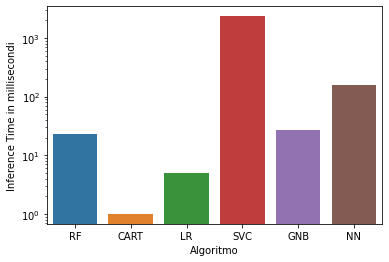

In [42]:
csv = read_csv("InfTimeReport.csv")
g = sbs.barplot(x=csv['Algoritmo'], y=csv['inf4'])
g.set_yscale("log")
plt.ylabel("Inference Time in millisecondi")
plt.show()

## Memoria Occupata 

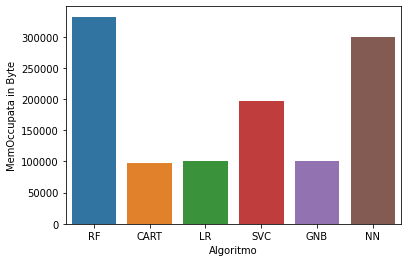

In [44]:
csv = read_csv("MemOccupationReport.csv")
sbs.barplot(x=csv['Algoritmo'], y=csv['Mem4'])
plt.ylabel("MemOccupata in Byte")
plt.show()